In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [34]:
df = pd.read_csv("liver_dataset.csv")

In [35]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [37]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [38]:
print(df.columns)
df.isnull().sum()

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [39]:
sns.countplot(data=df, x = 'Dataset', label='Count')
LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: {}'.format(LD))
print('Number of patients not diagnosed with liver disease: {}'.format(NLD))

Number of patients diagnosed with liver disease: 416
Number of patients not diagnosed with liver disease: 167


In [40]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

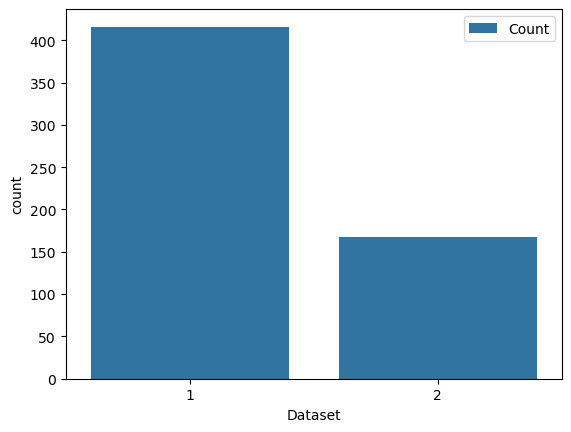

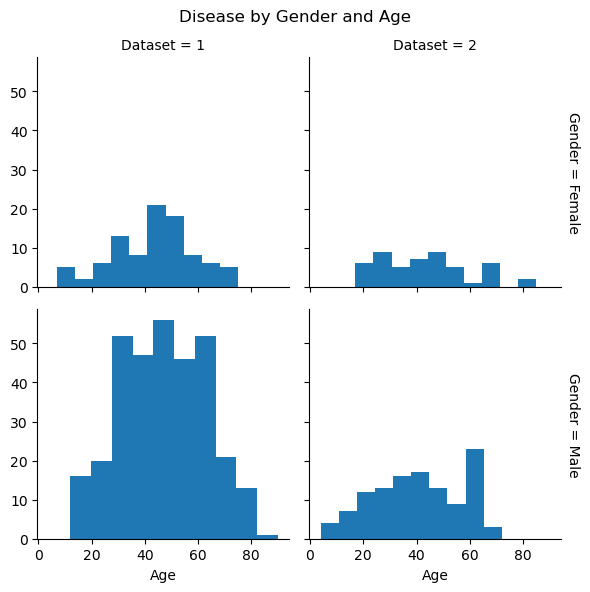

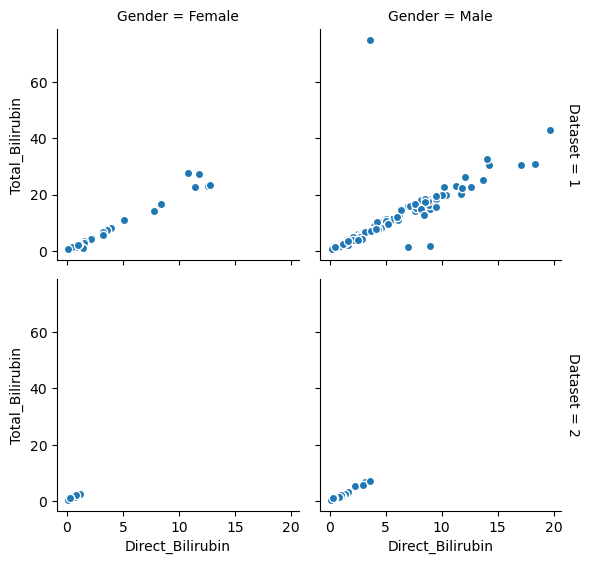

In [41]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)
plt.show()

In [42]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [43]:
X = df.drop(['Gender','Dataset'], axis=1)
y = df['Dataset'] # 1 for liver disease; 2 for no liver disease

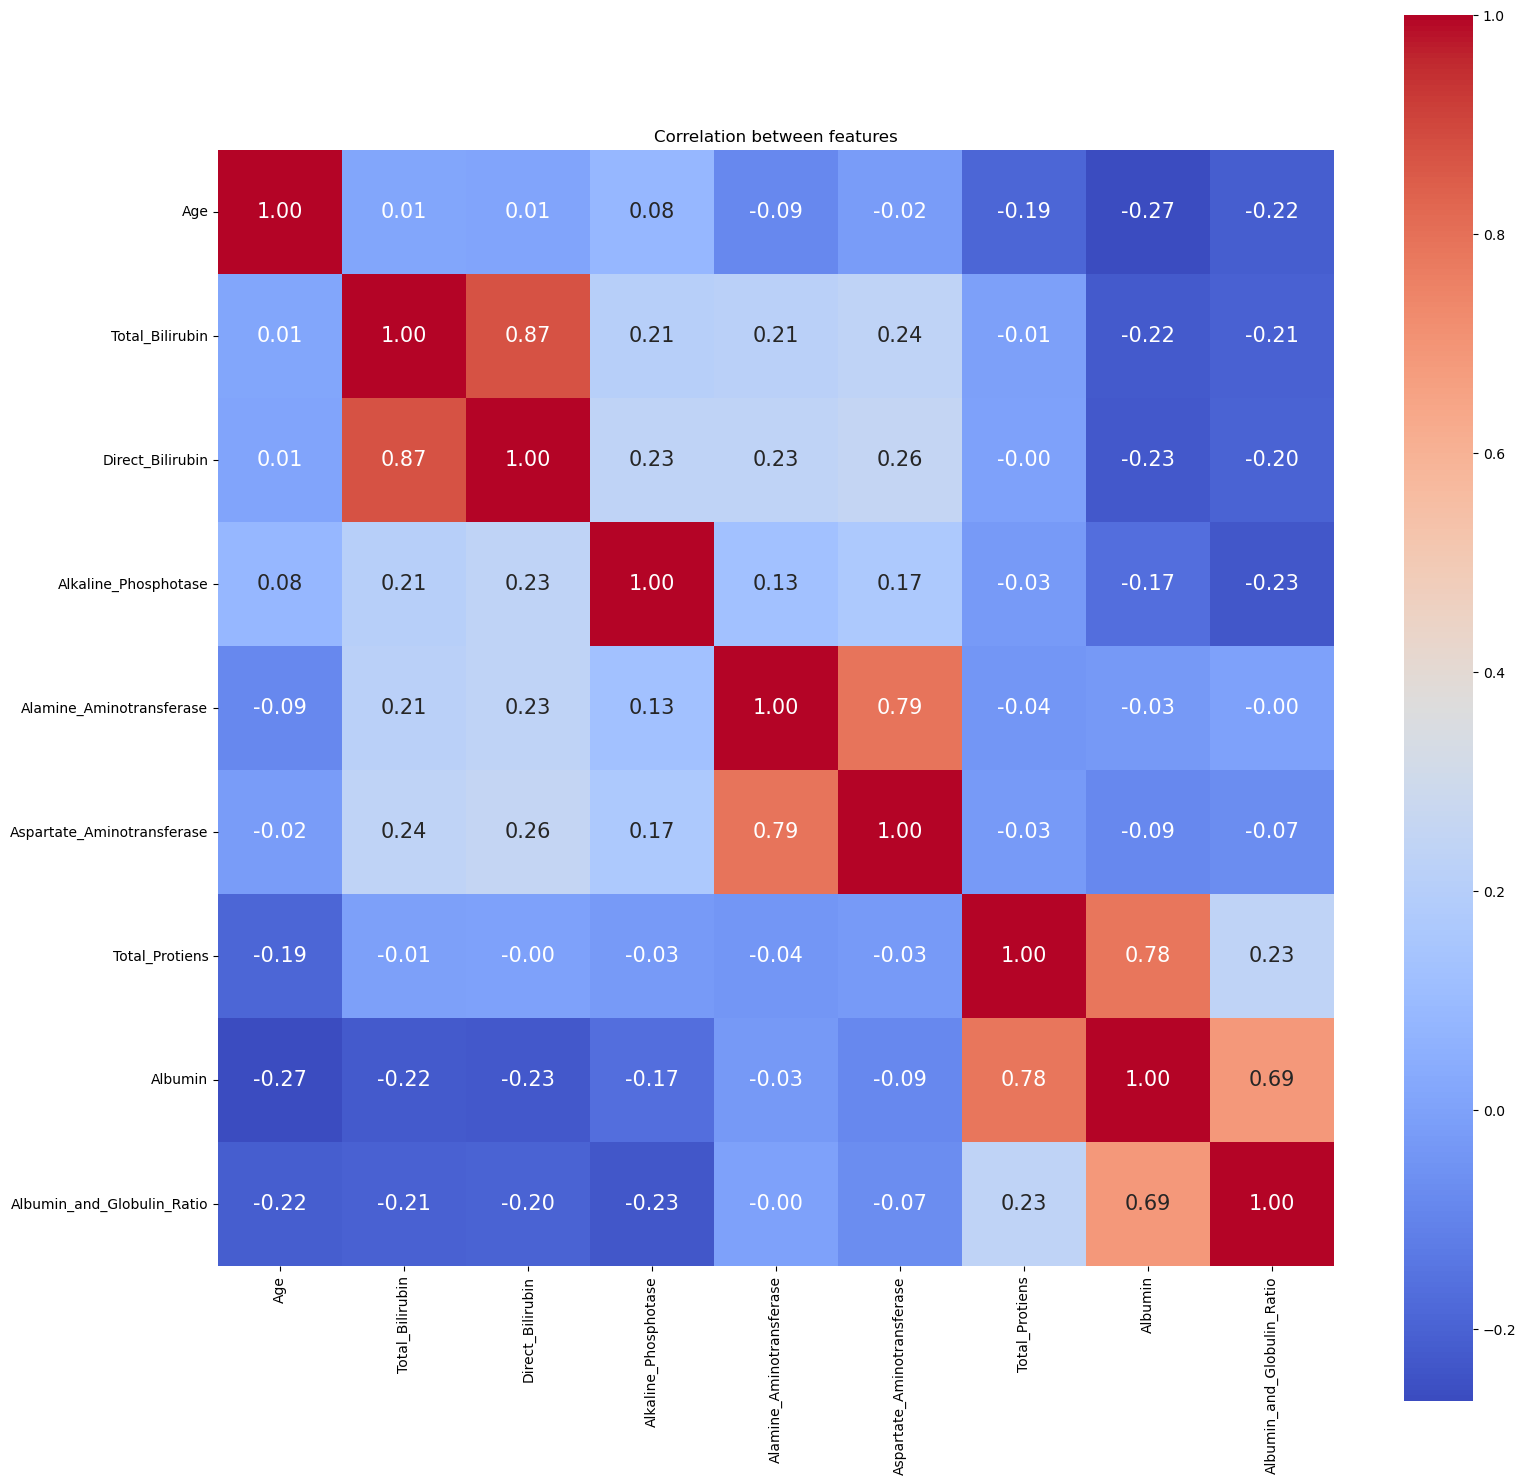

In [44]:
liver_corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');
plt.show()

In [45]:
patients=pd.read_csv('liver_dataset.csv')
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)
patients=patients.fillna(0.94)

In [46]:
X=patients[['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']
X

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.7,0.1,187,16,6.8,3.3,0.90
1,10.9,5.5,699,64,7.5,3.2,0.74
2,7.3,4.1,490,60,7.0,3.3,0.89
3,1.0,0.4,182,14,6.8,3.4,1.00
4,3.9,2.0,195,27,7.3,2.4,0.40
...,...,...,...,...,...,...,...
578,0.5,0.1,500,20,5.9,1.6,0.37
579,0.6,0.1,98,35,6.0,3.2,1.10
580,0.8,0.2,245,48,6.4,3.2,1.00
581,1.3,0.5,184,29,6.8,3.4,1.00


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))


<IPython.core.display.Javascript object>

Shape training set: X:(408, 7), y:(408,)
Shape test set: X:(175, 7), y:(175,)


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [49]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

clf_report = classification_report(y_test, y_pred)
print('Classification report')
print("---------------------")
print(clf_report)
print("_____________________")

<IPython.core.display.Javascript object>

Accuracy : 0.7314285714285714
Classification report
---------------------
              precision    recall  f1-score   support

           1       0.77      0.90      0.83       126
           2       0.54      0.31      0.39        49

    accuracy                           0.73       175
   macro avg       0.65      0.60      0.61       175
weighted avg       0.70      0.73      0.71       175

_____________________


In [50]:
input_data= (0.9,0.3,202,22,7.4,4.1,1.20)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
if (prediction[0] == 1):
  print('The person has liver disease')
else:
  print('The person has no liver disease')

The person has no liver disease


In [52]:
pickle.dump(model,open('liver_model_pred.pkl','wb'))

<IPython.core.display.Javascript object>